In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   tipePasien                768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [ ]:
dataku.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataku.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
tipePasien                  0
dtype: int64

In [ ]:
dataku_null = round(100*(dataku.isnull().sum())/len(dataku), 2)
dataku_null

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
tipePasien                  0.0
dtype: float64

In [ ]:
dataku = pd.DataFrame(dataset)
dataku.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = np.asarray(dataset)
print(X)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


Menampilkan data Insulin dan Glocose dalam bentuk scatter plot

Text(0, 0.5, 'Insulin')

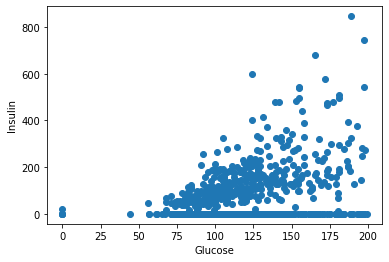

In [ ]:
plt.scatter(dataku['Glucose'],dataku['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')

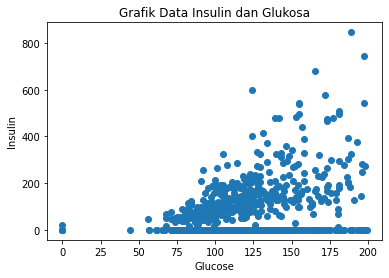

In [ ]:
plt.scatter(X[:,1], X[:,4], label="TruePosition")
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Grafik Data Insulin dan Glukosa")
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(dataku)
dataku_scaled = scaler.transform(dataku)

In [ ]:
dataku_scaled.head()

,Pregnancise,BloodPressure,SkinThickness,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [ ]:
dataku_scaled = pd.DataFrame(dataku_scaled, columns=['Pregnancise','BloodPressure','SkinThickness','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [ ]:
dataku.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,tipePasien
0,6,148,72,35,0,33.6,0.627,50,1,Tinggi
1,1,85,66,29,0,26.6,0.351,31,0,Tinggi
2,8,183,64,0,0,23.3,0.672,32,1,Rendah
3,1,89,66,23,94,28.1,0.167,21,0,Tinggi
4,0,137,40,35,168,43.1,2.288,33,1,Tinggi


In [ ]:
km = KMeans(n_clusters=2)
km

y_predicted = km.fit_predict(dataku_scaled[['Glucose','Insulin']])
y_predicted

dataku['hasilPrediksi'] = y_predicted

In [ ]:
dataku.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,hasilPrediksi
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


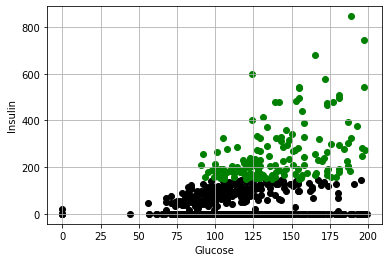

In [ ]:
df1 = dataku[dataku.hasilPrediksi==0]
df2 = dataku[dataku.hasilPrediksi==1]


plt.scatter(df1.Glucose,df1['Insulin'],color='black')
plt.scatter(df2.Glucose,df2['Insulin'],color='green')

plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.grid()

In [ ]:
conditions = [
    (dataku['hasilPrediksi']==0),
    (dataku['hasilPrediksi']==1)]
choices = ['Tinggi','Rendah']
dataku['hasilPrediksi'] = np.select(conditions, choices)

In [ ]:
print(dataku[:15])

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [ ]:
dataku.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,hasilPrediksi
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
print(dataku)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome hasilPrediksi  
0                       0.627   50        1        

In [ ]:
print(kmeans.cluster_centers_)

[[3.52765957e+00 1.29327660e+02 7.14468085e+01 3.03063830e+01
  1.59102128e+02 3.39893617e+01 5.40276596e-01 3.19021277e+01
  4.17021277e-01]
 [3.98181818e+00 1.14008081e+02 6.77717172e+01 1.49979798e+01
  1.44000000e+01 3.08054545e+01 4.31931313e-01 3.37595960e+01
  2.98989899e-01]
 [4.02631579e+00 1.58447368e+02 7.20000000e+01 3.22631579e+01
  4.41289474e+02 3.51078947e+01 5.69210526e-01 3.47631579e+01
  5.78947368e-01]]


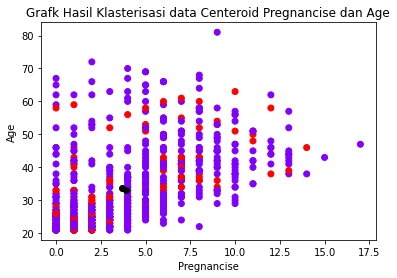

In [ ]:
plt.scatter(X[:,0], X[:,7], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,7], color= 'black')
plt.xlabel("Pregnancise")
plt.ylabel("Age")
plt.title("Grafk Hasil Klasterisasi data Centeroid Pregnancise dan Age")
plt.show()